<a href="https://colab.research.google.com/github/colaresm/Machine-Learning-Projects/blob/main/Prevendo_pre%C3%A7os_de_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 [Dataset link](https://www.kaggle.com/hellbuoy/car-price-prediction)

# Leitura dos dados

In [3]:
df= pd.read_csv('/content/CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualização dos dados

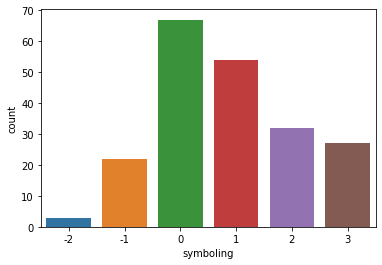

In [5]:
sns.countplot(data=df,x='symboling')

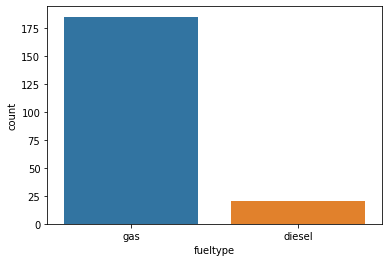

In [6]:
sns.countplot(data=df,x='fueltype')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


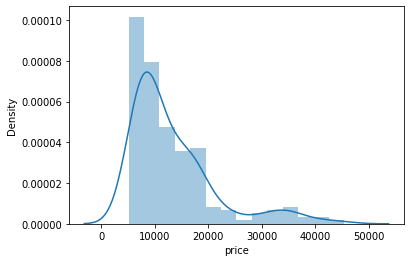

In [7]:
sns.distplot(df['price'])

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Pré-processamento

## Separação dos previsores

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CarName'] = encoder.fit_transform(df['CarName'])
CarName = {index : label for index, label in enumerate(encoder.classes_)}

In [10]:
df['fueltype'] = encoder.fit_transform(df['fueltype'])
fueltype = {index : label for index, label in enumerate(encoder.classes_)}
 

In [11]:
df['aspiration'] = encoder.fit_transform(df['aspiration'])
aspiration = {index : label for index, label in enumerate(encoder.classes_)}

In [12]:
df['doornumber'] = encoder.fit_transform(df['doornumber'])
doornumber = {index : label for index, label in enumerate(encoder.classes_)}
 

In [13]:
df['carbody'] = encoder.fit_transform(df['carbody'])
carbody = {index : label for index, label in enumerate(encoder.classes_)}

In [14]:
df['drivewheel'] = encoder.fit_transform(df['drivewheel'])
drivewheel = {index : label for index, label in enumerate(encoder.classes_)}

In [15]:
df['enginelocation'] = encoder.fit_transform(df['enginelocation'])
enginelocation = {index : label for index, label in enumerate(encoder.classes_)}

In [16]:
df['enginetype'] = encoder.fit_transform(df['enginetype'])
enginetype = {index : label for index, label in enumerate(encoder.classes_)}

In [17]:
df['cylindernumber'] = encoder.fit_transform(df['cylindernumber'])
cylindernumber = {index : label for index, label in enumerate(encoder.classes_)}

In [18]:
df['fuelsystem'] = encoder.fit_transform(df['fuelsystem'])
fuelsystem = {index : label for index, label in enumerate(encoder.classes_)}

In [20]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
X=df.drop(['car_ID','price'],axis=1)
y=df['price']

In [22]:
y=df.iloc[:,-1].values
y[0]

13495.0

# Modelos de regressão

In [27]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Regressão linear 

In [28]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8272435957648938

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,reg.predict(X_test) )

10429411.213375172

Text(0, 0.5, 'Previsto')

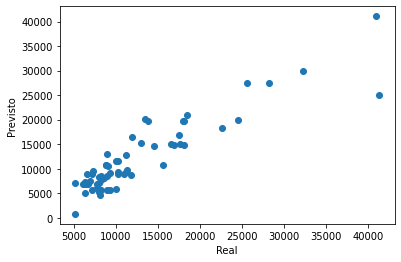

In [40]:
plt.scatter( y_test,reg.predict(X_test)   )
plt.xlabel('Real')
plt.ylabel('Previsto')

## Rede neural

In [31]:
from sklearn.neural_network import MLPRegressor

In [38]:
rede = MLPRegressor(random_state=1, max_iter=1500).fit(X_train, y_train)
rede.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8254094191419338

In [45]:
mean_squared_error(y_test,rede.predict(X_test) )

10540141.5930882

Text(0, 0.5, 'Previsto')

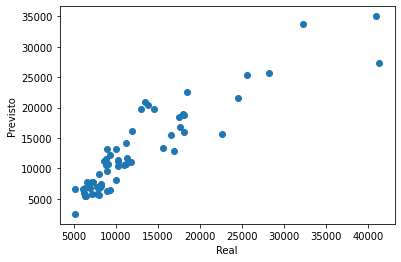

In [42]:
plt.scatter( y_test,rede.predict(X_test)   )
plt.xlabel('Real')
plt.ylabel('Previsto')